In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [133]:
### collecting data

In [134]:
df=pd.read_csv(r'E:\project\hotel_bookings.csv')

In [135]:
type(df)

pandas.core.frame.DataFrame

In [136]:
### data cleaning


In [137]:
### checking missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [138]:
df.drop(['agent','company'],axis=1,inplace=True)

In [139]:
df['country'].value_counts().index[0]

'PRT'

In [140]:
df['country'].fillna(df['country'].value_counts().index[0], inplace =True)

In [141]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [142]:
df.fillna(0,inplace=True)

In [143]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [144]:
filter1= (df['children']==0)  &  (df['adults']==0)  &  (df['children']==0)

In [145]:
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [146]:
data=df[~filter1]

In [147]:
data.shape

(119210, 30)

In [148]:
data2=data[data['is_canceled']==0]

In [149]:
len(data2)    ### number of rows

75011

In [150]:
data2['country'].value_counts() / 75011

PRT    0.285265
GBR    0.128888
FRA    0.112890
ESP    0.085094
DEU    0.080881
         ...   
BHR    0.000013
DJI    0.000013
MLI    0.000013
NPL    0.000013
FRO    0.000013
Name: country, Length: 165, dtype: float64

In [151]:
country_wise_data= data2['country'].value_counts().reset_index()
country_wise_data.columns=['country','number of guests']
country_wise_data

,country,number of guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [152]:
!pip install plotly

In [153]:
!pip install chart_studio

In [154]:
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [155]:
import plotly.express as px

In [156]:
map_guest= px.choropleth(country_wise_data,locations= country_wise_data['country'],
              color=country_wise_data['number of guests'],hover_name= country_wise_data['country'], title='country of guests')

map_guest.show()

In [157]:
 data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0.5, 1.0, 'price of rooms per night per person')

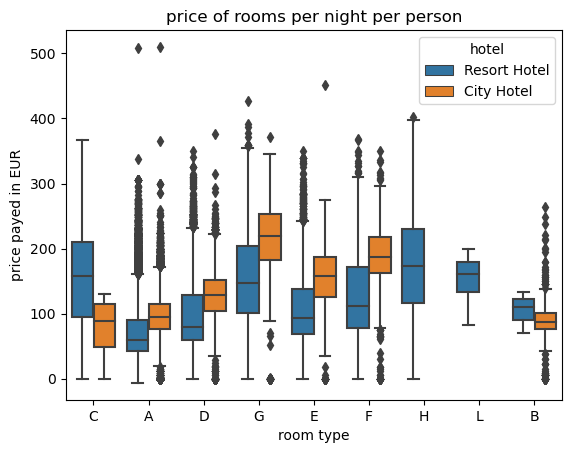

In [158]:
sns.boxplot(x='reserved_room_type', y='adr', hue='hotel', data= data2)
plt.xlabel('room type')
plt.ylabel('price payed in EUR')
plt.title('price of rooms per night per person')

In [159]:
data2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [160]:
data_resort=data[(data['hotel']=='Resort Hotel')& (data['is_canceled']==0)]

In [161]:
data_city=data[(data['hotel']=='City Hotel')& (data['is_canceled']==0)]

In [162]:
rush_resort=data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month', 'no. of guests']
rush_resort

,month,no. of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [163]:
rush_city=data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month', 'no. of guests']
rush_city

,month,no. of guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [164]:
final_rush=rush_resort.merge(rush_city, on='month')


In [165]:
final_rush.columns=['month', 'guests in resort', 'guests in city']

In [166]:
final_rush

,month,guests in resort,guests in city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [167]:
!pip install sorted-months_weekdays


In [168]:
!pip install sort_dataframeby_monthorweek

In [169]:
import sort_dataframeby_monthorweek as sd

In [170]:
final_rush=sd.Sort_Dataframeby_Month(final_rush,'month')

In [171]:
final_rush

,month,guests in resort,guests in city
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [172]:
px.line(final_rush,x='month',y=['guests in resort', 'guests in city'])

In [173]:
## peak is at august 
##high demand is in july and may and october

In [174]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [175]:
data=sd.Sort_Dataframeby_Month(data,'arrival_date_month',)

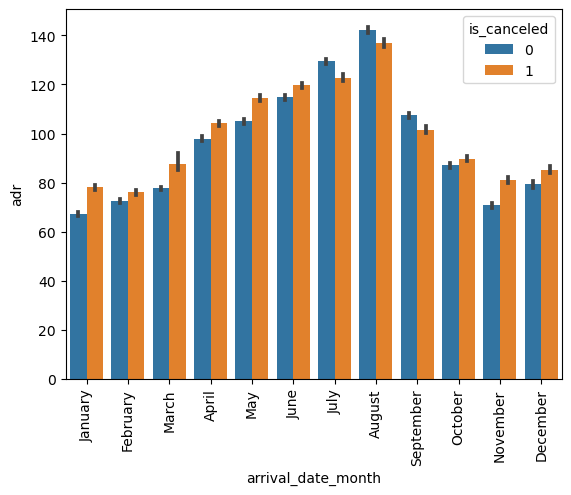

In [176]:
sns.barplot(x='arrival_date_month',y='adr',data=data, hue='is_canceled')
plt.xticks(rotation='vertical')
plt.show()

In [177]:
## high adr more is chance of cancelation

In [178]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [179]:
pd.crosstab(index=data['stays_in_weekend_nights'],columns=data['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:

def week_function(row):
    feature1='stays_in_weekend_nights'
    feature2='stays_in_week_nights'
    
    if row[feature2]==0 and row[feature1] >0 :
        return 'stay_just_weekend'
    
    elif row[feature2]>0 and row[feature1] ==0 :
        return 'stay_just_weekdays'
    
    elif row[feature2]>0 and row[feature1] >0 :
        return 'stay_both_weekdays_weekends'
    
    else:
        return 'undefined_data'

In [181]:
data2['weekend_or_weekday']=data2.apply(week_function,axis=1)

In [182]:
data2['weekend_or_weekday'].value_counts()

stay_both_weekdays_weekends    37551
stay_just_weekdays             31788
stay_just_weekend               5050
undefined_data                   622
Name: weekend_or_weekday, dtype: int64

In [183]:
data2=sd.Sort_Dataframeby_Month(data2,'arrival_date_month')

In [184]:
data2.groupby(['arrival_date_month','weekend_or_weekday']).size()

arrival_date_month  weekend_or_weekday         
April               stay_both_weekdays_weekends    3627
                    stay_just_weekdays             2559
                    stay_just_weekend               344
                    undefined_data                   30
August              stay_both_weekdays_weekends    4929
                    stay_just_weekdays             3137
                    stay_just_weekend               509
                    undefined_data                   49
December            stay_both_weekdays_weekends    1901
                    stay_just_weekdays             2123
                    stay_just_weekend               298
                    undefined_data                   69
February            stay_both_weekdays_weekends    2438
                    stay_just_weekdays             2514
                    stay_just_weekend               360
                    undefined_data                   47
January             stay_both_weekdays_weekends    1550


In [185]:
group_data=data2.groupby(['arrival_date_month','weekend_or_weekday']).size().unstack().reset_index()

In [186]:
sorted_data=sd.Sort_Dataframeby_Month(group_data,'arrival_date_month')

In [187]:
sorted_data.set_index('arrival_date_month',inplace=True)

In [188]:
sorted_data

,stay_both_weekdays_weekends,stay_just_weekdays,stay_just_weekend,undefined_data
arrival_date_month,,,,
January,1550,2125,393,47
February,2438,2514,360,47
March,3151,3060,359,50
April,3627,2559,344,30
May,3442,3017,570,74
June,3241,2685,433,36
July,4570,2818,462,57
August,4929,3137,509,49
September,3192,2692,479,22


<AxesSubplot:xlabel='arrival_date_month'>

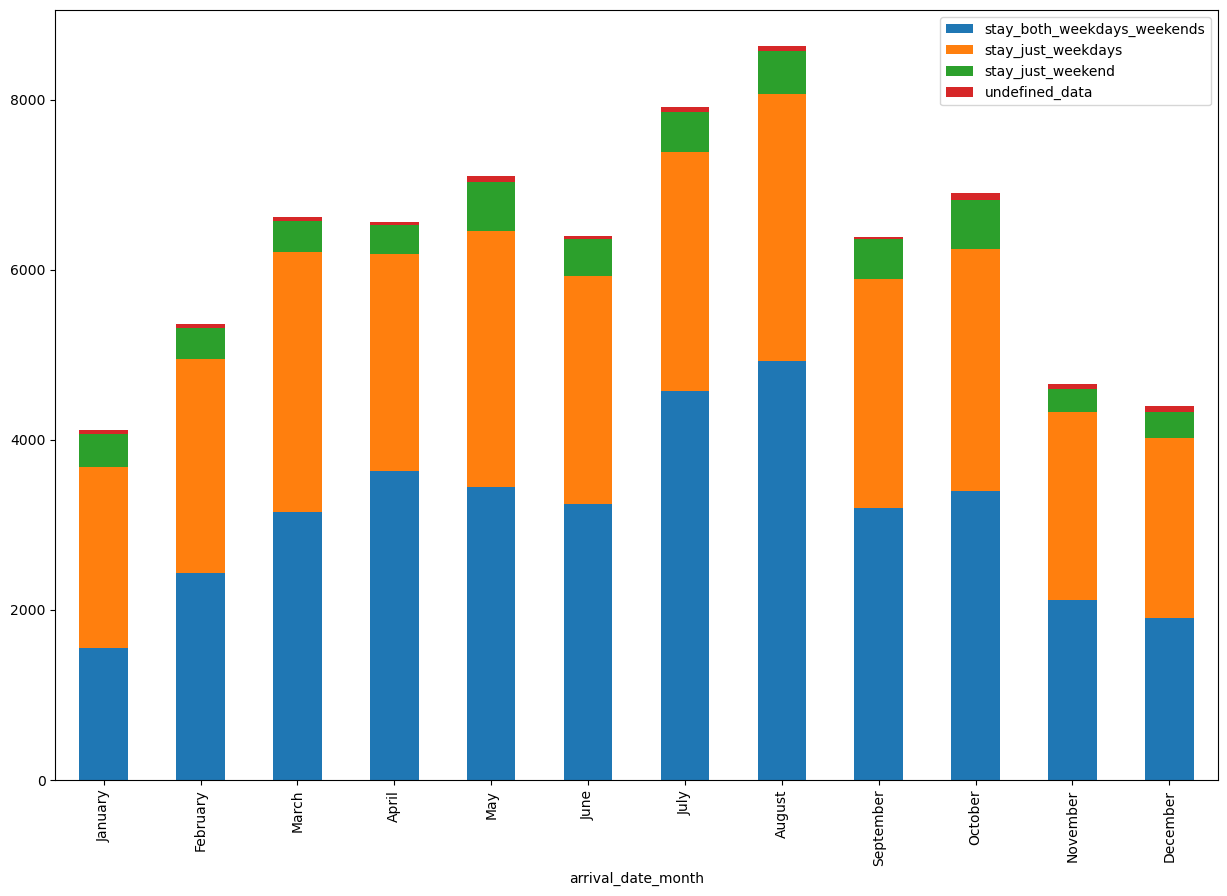

In [189]:
sorted_data.plot(kind='bar',stacked=True,figsize=(15,10))

In [190]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday'],
      dtype='object')

In [191]:
def family(row):
    if (row['adults']>0) &  (row['children']>0 or row['babies']>0) :
        return 1
    else:
        return 0

In [192]:
data['is_family']=data.apply(family,axis=1)

In [193]:
data['total_customer'] = data['adults'] + data['babies'] + data['children']

In [194]:
data['total_nights']=data['stays_in_week_nights'] + data['stays_in_weekend_nights']

In [195]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights'],
      dtype='object')

In [196]:
data['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [197]:
dict1={'No Deposit':0, 'Non Refund':1, 'Refundable': 0}

In [198]:
data['deposit_given']=data['deposit_type'].map(dict1)

In [199]:
data.drop(columns=['adults', 'children', 'babies', 'deposit_type'],axis=1,inplace=True)

In [200]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

In [201]:
##mean encoding
cate_features=[col for col in data.columns if data[col].dtype=='object']

In [202]:
num_features=[col for col in data.columns if data[col].dtype!='object']

In [203]:
data_cat=data[cate_features]

In [204]:
data.groupby(['hotel'])['is_canceled'].mean().to_dict()

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}

In [205]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [206]:
data_cat['cancellation']=data['is_canceled']

In [207]:
cols=data_cat.columns

In [208]:
cols=cols[0:-1]

In [209]:

for col in cols:
    dict2=data_cat.groupby([col])['cancellation'].mean().to_dict()
    data_cat[col]=data_cat[col].map(dict2)

In [210]:
data_cat.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.254504,0.0,0.048276,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.254504,0.0,0.048276,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.407864,1.0,0.101010,1


In [211]:
dataframe=pd.concat([data_cat,data[num_features]],axis=1)

In [212]:
dataframe

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.367590,0.410598,0.391567,0.251373,0.254504,0.0,...,0,0,0,59.94,0,1,0,2.0,1,0
1,0.277674,0.305016,0.374106,0.379365,0.367590,0.410598,0.407654,0.352528,0.254504,0.0,...,0,0,0,116.10,1,1,1,4.0,1,0
2,0.277674,0.305016,0.374106,0.562958,0.367590,0.410598,0.318108,0.251373,0.407864,1.0,...,0,0,0,89.00,0,1,0,2.0,1,0
3,0.277674,0.305016,0.344653,0.252336,0.367590,0.410598,0.391567,0.251373,0.407864,0.0,...,0,0,0,73.46,0,2,0,2.0,2,0
4,0.277674,0.305016,0.374106,0.562958,0.367590,0.410598,0.364723,0.306002,0.407864,1.0,...,0,0,0,119.00,0,0,1,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0.417859,0.350348,0.374106,0.373537,0.153712,0.174868,0.292683,0.247134,0.407864,0.0,...,0,4,0,117.82,0,1,1,3.0,11,0
119206,0.417859,0.350348,0.374064,0.185848,0.367590,0.410598,0.391567,0.445055,0.407864,0.0,...,0,0,0,90.34,0,1,0,2.0,7,0
119207,0.417859,0.350348,0.374106,0.185848,0.343313,0.410598,0.391567,0.237233,0.407864,0.0,...,0,0,0,103.57,0,0,0,2.0,7,0
119208,0.417859,0.350348,0.374064,0.167193,0.367590,0.410598,0.391567,0.445055,0.254504,0.0,...,0,2,0,68.57,0,2,0,2.0,12,0


In [213]:
dataframe.drop(['cancellation'],axis=1,inplace=True)

In [214]:
##handeling outliers

In [215]:
def handle_outlier(col):
    dataframe[col]=np.log1p(dataframe[col])

In [216]:
handle_outlier('lead_time')

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

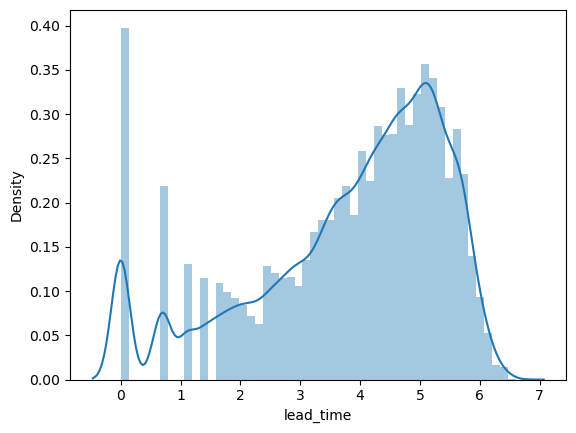

In [217]:
sns.distplot(dataframe['lead_time'])

<AxesSubplot:xlabel='adr', ylabel='Density'>

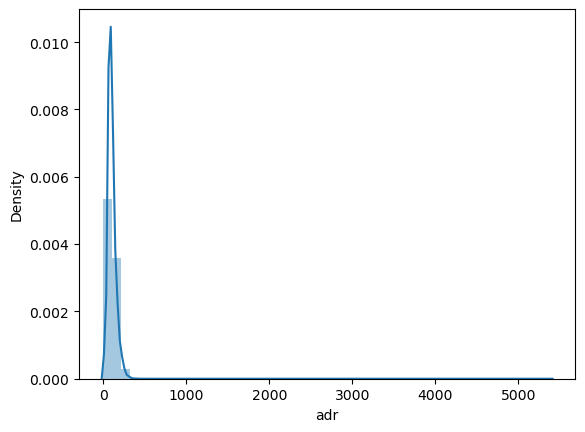

In [218]:
##adr
sns.distplot(dataframe['adr'])

In [219]:
dataframe[dataframe['adr']<0]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
14989,0.277674,0.322277,0.374106,0.20231,0.611086,0.174868,0.391567,0.352528,0.254504,0.0,...,2,2,0,-6.38,0,0,0,2.0,10,0


In [220]:
handle_outlier('adr')

In [221]:
dataframe['adr'].isnull().sum()

1

<AxesSubplot:xlabel='adr', ylabel='Density'>

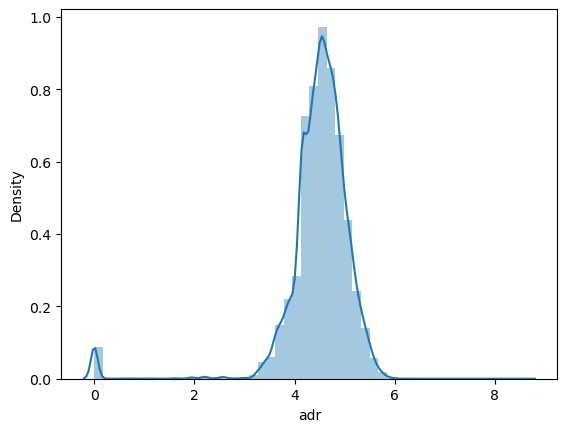

In [222]:
sns.distplot(dataframe['adr'].dropna())

In [223]:
corr=dataframe.corr()
dataframe.shape

(119210, 30)

In [224]:
corr

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
hotel,1.000000,0.051197,0.061782,-0.040609,0.102592,0.182266,0.198171,0.280884,-0.008378,0.137082,...,-0.004467,-0.076598,0.072725,0.154041,-0.218961,-0.043478,-0.058094,-0.038762,-0.249747,0.172415
arrival_date_month,0.051197,1.000000,-0.010208,-0.052405,0.047902,0.077075,-0.038801,0.015456,-0.029636,0.069886,...,-0.021971,-0.011049,0.029164,0.228179,-0.021910,0.002763,0.020491,0.079090,0.045648,0.057361
meal,0.061782,-0.010208,1.000000,0.022476,-0.026007,-0.025486,0.010035,0.013913,0.105767,0.050584,...,0.011109,-0.027189,-0.031562,-0.019908,0.003455,0.006875,0.001466,-0.003447,-0.055689,0.047597
country,-0.040609,-0.052405,0.022476,1.000000,0.078982,-0.129774,0.153177,0.125415,-0.029320,0.357232,...,0.091795,-0.061513,0.067054,-0.160520,0.007613,-0.200822,-0.044139,-0.117351,-0.160759,0.395685
market_segment,0.102592,0.047902,-0.026007,0.078982,1.000000,0.540116,0.182813,0.209272,-0.265606,0.267006,...,-0.117519,-0.057578,0.096385,-0.004009,-0.145726,-0.155463,-0.104584,-0.023874,-0.004546,0.397229
distribution_channel,0.182266,0.077075,-0.025486,-0.129774,0.540116,1.000000,0.070381,0.118970,-0.023234,0.177167,...,-0.142650,-0.118461,0.048001,0.126516,-0.146562,0.075047,-0.026278,0.087776,0.084999,0.115160
reserved_room_type,0.198171,-0.038801,0.010035,0.153177,0.182813,0.070381,1.000000,0.722724,-0.143390,0.072769,...,0.022533,-0.040134,0.068336,-0.185932,-0.093401,-0.161406,-0.133748,-0.246347,-0.188866,0.201923
assigned_room_type,0.280884,0.015456,0.013913,0.125415,0.209272,0.118970,0.722724,1.000000,-0.084025,0.201570,...,-0.003205,-0.096277,0.067129,-0.038347,-0.131035,-0.135337,-0.179356,-0.229081,-0.103571,0.263383
customer_type,-0.008378,-0.029636,0.105767,-0.029320,-0.265606,-0.023234,-0.143390,-0.084025,1.000000,0.136617,...,0.024716,-0.095486,-0.101833,0.117592,0.061786,0.137114,0.106618,0.124318,0.037720,0.121789
reservation_status,0.137082,0.069886,0.050584,0.357232,0.267006,0.177167,0.072769,0.201570,0.136617,1.000000,...,-0.057365,-0.144832,0.054301,0.081660,-0.195701,-0.234877,-0.013226,0.044826,0.018554,0.481507


In [225]:
corr['is_canceled'].sort_values(ascending=False)

reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.488307
deposit_given                     0.481507
country                           0.357232
lead_time                         0.320075
market_segment                    0.267006
assigned_room_type                0.201570
distribution_channel              0.177167
hotel                             0.137082
customer_type                     0.136617
previous_cancellations            0.110139
adr                               0.081660
reserved_room_type                0.072769
arrival_date_month                0.069886
days_in_waiting_list              0.054301
meal                              0.050584
total_customer                    0.044826
stays_in_week_nights              0.025542
total_nights                      0.018554
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
stays_in_weekend_nights          -0.001323
arrival_dat

In [226]:
features_to_drop=['reservation_status', 'reservation_status_date','arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month']

In [227]:
dataframe.drop(features_to_drop,axis=1,inplace=True)

In [228]:
dataframe.shape

(119210, 24)

In [229]:

dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
customer_type                     0
is_canceled                       0
lead_time                         0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
is_family                         0
total_customer                    0
total_nights                      0
deposit_given                     0
dtype: int64

In [230]:
dataframe.dropna(inplace=True)

In [231]:
## separate dependent & independent features
x=dataframe.drop('is_canceled',axis=1)

In [232]:
y=dataframe['is_canceled']

In [233]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [234]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005))

In [235]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [236]:
feature_sel_model.get_support()

array([False, False, False,  True, False, False, False, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True])

In [237]:
cols=x.columns

In [238]:
# let's print the number of selected features

selected_feature=cols[feature_sel_model.get_support()]

In [239]:
selected_feature

Index(['country', 'lead_time', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customer', 'total_nights',
       'deposit_given'],
      dtype='object')

In [240]:
x=x[selected_feature]

In [241]:
y

0         0
1         0
2         1
3         0
4         1
         ..
119205    0
119206    0
119207    0
119208    0
119209    0
Name: is_canceled, Length: 119209, dtype: int64

In [242]:
from sklearn.model_selection import train_test_split

In [243]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.25)

In [244]:
X_train.shape

(89406, 12)

In [245]:
from sklearn.linear_model import LogisticRegression

In [246]:
logreg=LogisticRegression()

In [247]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [248]:
#prediction of logritmic regression
pred=logreg.predict(X_test)

In [249]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [250]:
from sklearn.metrics import confusion_matrix

In [251]:
confusion_matrix(y_test,pred)

array([[17485,  1275],
       [ 4662,  6381]], dtype=int64)

In [252]:
from sklearn.metrics import accuracy_score

In [253]:
##accuracy of logrithmic regression 1
accuracy_score(y_test,pred)

0.8007918665906116

In [254]:
#80 % in range of 77-8

In [255]:
##cross validation
from sklearn.model_selection import cross_val_score

In [256]:
score=cross_val_score(logreg,x,y,cv=10)

In [257]:
score

array([0.77845818, 0.78449794, 0.78290412, 0.81494841, 0.81469675,
       0.74138076, 0.74104521, 0.8557168 , 0.83063501, 0.80419463])

In [258]:
score.mean()

0.7948477828590795

In [259]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



In [262]:
models=[]

models.append(('LogisticRegression',LogisticRegression()))
models.append(('Naive_bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('Decision_tree',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))

In [263]:
from sklearn.metrics import make_scorer,f1_score, precision_score, recall_score, roc_auc_score, log_loss

In [266]:
for name,model in models:
    print(name)
    model.fit(X_train,y_train)
    
    predictions=model.predict(X_test)
    
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    
    from sklearn.metrics import accuracy_score
    acc=accuracy_score(predictions,y_test)
    dt_f1=f1_score(y_test,predictions)
    dt_recall=recall_score(y_test,predictions)
    dt_precision=precision_score(y_test,predictions)
    
    print('accuracy:', acc)
    print('\n')
    print('f1:', dt_f1)
    print('\n')
    print('recall:', dt_recall)
    print('\n')
    print('precision:', dt_precision)
    print('\n')

LogisticRegression
[[17485  4662]
 [ 1275  6381]]
accuracy: 0.8007918665906116


f1: 0.6824963901812932


recall: 0.5778321108394459


precision: 0.8334639498432602


Naive_bayes
[[ 6668   653]
 [12092 10390]]
accuracy: 0.5723584874005972


f1: 0.6198359433258761


recall: 0.9408675178846329


precision: 0.4621474957743973


Random Forest
[[17265  2679]
 [ 1495  8364]]
accuracy: 0.859946985202832


f1: 0.8003061907951393


recall: 0.7574028796522684


precision: 0.8483619028299016


Decision_tree
[[16078  2621]
 [ 2682  8422]]
accuracy: 0.8220648927960272


f1: 0.7605544769043211


recall: 0.7626550756135109


precision: 0.7584654178674352


KNN
[[16822  3382]
 [ 1938  7661]]
accuracy: 0.8214944804214341


f1: 0.7422730355585699


recall: 0.6937426423978991


precision: 0.7981039691634545


